In [ ]:
!pip install keras-core --upgrade
!pip install -q keras-nlp
!pip install seaborn
!pip install -U scikit-learn

import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 5.0 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 449, in run
    installed = install_given_reqs(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/__init__.py", line 72, in install_given_reqs
    requirement.install(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 800, in install
    install_wheel(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/operations/install/wheel.py", line 731, in install_wheel
    _install_wheel(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras_nlp
import keras
import seaborn as sns
import matplotlib.pyplot as plt
import os

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("KerasNLP version:", keras_nlp.__version__)

TensorFlow version: 2.16.1
Keras version: 3.2.1
KerasNLP version: 0.9.3


In [ ]:
import tensorflow as tf
import tensorflow_text as text
from tensorflow import keras

In [ ]:
df_train_scores = pd.read_csv("./train_scores.csv")
df_train_scores.head()

,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0


Text(0.5, 1.0, 'Distribution of scores')

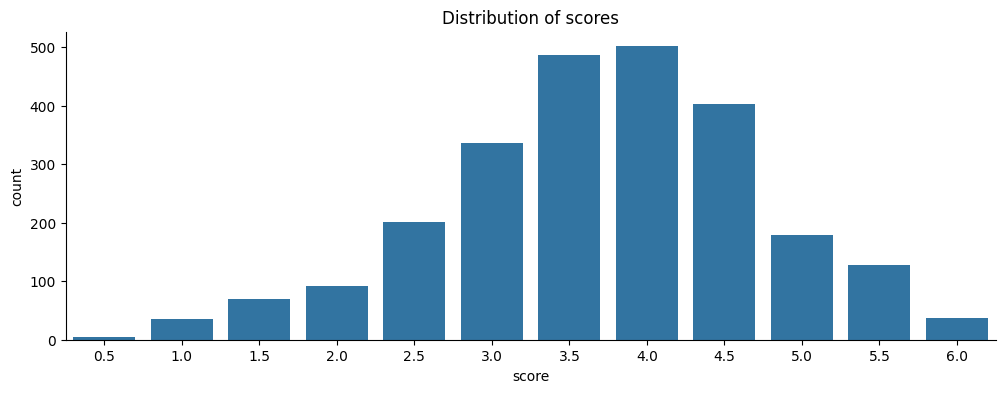

In [ ]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_scores,
                   x="score")

ax.set_title("Distribution of scores")

In [ ]:
df_train_logs = pd.read_csv("./train_logs.csv")
df_test_logs = pd.read_csv("./test_logs.csv")


print(df_train_logs.shape)
print(df_test_logs.shape)
df_train_logs.head()

(2952616, 11)
(6, 11)


,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0.0,0.0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0.0,0.0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0.0,0.0
3,001519c8,4,106686,106777,91,Input,q,q,q,1.0,1.0
4,001519c8,5,107196,107323,127,Input,q,q,q,2.0,1.0


The average of the number of events per essay in the train dataset is : 1682.0
The average of the number of events per essay in the test dataset is : 2.0


Text(0.5, 0.98, 'Distribution of the number of events per essay - Test dataset')

<Figure size 3000x1800 with 0 Axes>

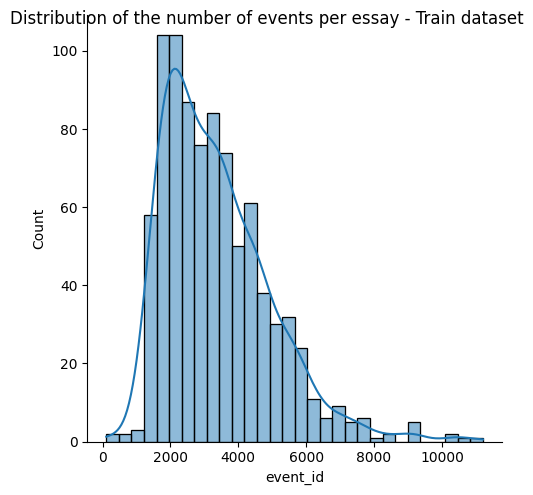

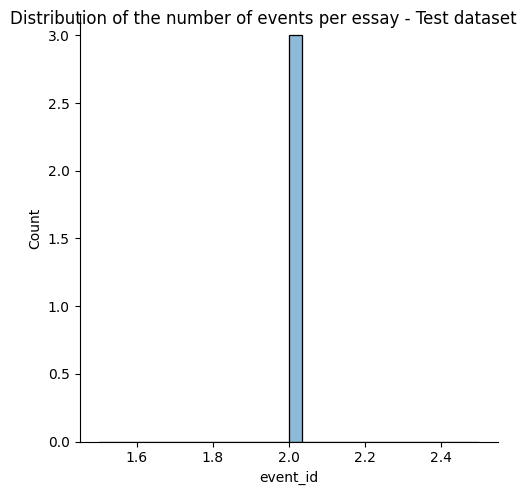

In [ ]:
print('The average of the number of events per essay in the train dataset is : ' + str(df_train_logs.groupby("id").mean(numeric_only=True)["event_id"].mean().round(0)))
print('The average of the number of events per essay in the test dataset is : ' + str(df_test_logs.groupby("id").mean(numeric_only=True)["event_id"].mean().round(0)))

fig = plt.figure(figsize=(30,18))
plot = sns.displot(data=df_train_logs[["id","event_id"]].groupby("id").count(),
                 x="event_id", bins=30, kde=True)
plot.fig.suptitle("Distribution of the number of events per essay - Train dataset")

plot = sns.displot(df_test_logs[["id","event_id"]].groupby("id").count(),
                   x="event_id", bins=30, kde=True)
plot.fig.suptitle("Distribution of the number of events per essay - Test dataset")

In [ ]:
df_event_count = df_train_logs['up_event'].value_counts().to_frame().reset_index().sort_values(by='count', ascending=[False])
df_event_count

,up_event,count
0,q,1878341
1,Space,419796
2,Backspace,331416
3,Shift,121603
4,ArrowRight,50457
...,...,...
92,F10,1
91,S,1
90,_,1
89,Escape,1


In [ ]:
vocab_event = df_event_count["up_event"].values
vocab_event

array(['q', 'Space', 'Backspace', 'Shift', 'ArrowRight', 'Leftclick',
       'ArrowLeft', '.', ',', 'ArrowDown', 'ArrowUp', 'Enter', 'CapsLock',
       "'", 'Delete', 'Control', '-', '"', '?', 'ContextMenu', ';',
       'Unidentified', '=', 'Tab', '/', 'Rightclick', 'Meta', ':', 'Alt',
       '\\', 'End', '(', ')', '!', 'c', 'Insert', '[', 'NumLock', 'v',
       'z', 'a', 'Home', 's', 'Dead', 't', 'AudioVolumeUp', '&', '*',
       'ModeChange', 'F3', 'i', 'x', '$', 'F15', 'AudioVolumeDown',
       'Process', 'w', '>', '%', ']', 'm', 'Middleclick', 'h', '+', 'b',
       'e', 'PageDown', 'y', 'o', 'r', 'MediaTrackNext', '<', '#', '{',
       'p', 'n', 'MediaPlayPause', '@', 'V', 'AudioVolumeMute', '`', 'f',
       'PageUp', 'F11', '}', 'Unknownclick', 'AltGraph', '\x96', 'l', '^',
       'F12', 'Cancel', 'u', 'MediaTrackPrevious', '¿', 'ScrollLock',
       '\x9b', 'd', 'T', 'g', '~', 'j', 'A', 'F10', 'S', '_', 'Escape',
       '2'], dtype=object)

In [ ]:
SEQ_LENGTH = 1700
df_train_prepared_logs = df_train_logs[['id','event_id', 'up_event']][df_train_logs['event_id'] < SEQ_LENGTH]

df_train_prepared_logs = pd.pivot_table(data= df_train_prepared_logs, index='id', columns='event_id', values='up_event', fill_value='', aggfunc='first')
df_train_prepared_logs

event_id,1,2,3,4,5,6,7,8,9,10,...,1690,1691,1692,1693,1694,1695,1696,1697,1698,1699
id,,,,,,,,,,,,,,,,,,,,,
001519c8,Leftclick,Leftclick,Shift,q,q,q,q,q,q,Space,...,q,q,q,q,q,Space,Backspace,.,Space,Space
0022f953,Leftclick,Shift,q,q,q,q,Space,q,q,Space,...,Shift,q,q,q,q,q,q,Space,q,q
0042269b,Leftclick,Shift,q,q,q,q,q,q,q,Space,...,q,q,q,q,q,q,q,Space,q,q
0059420b,Leftclick,Leftclick,Shift,Shift,Shift,Shift,Shift,Shift,Shift,Shift,...,,,,,,,,,,
0075873a,Leftclick,Shift,q,q,q,q,q,q,q,q,...,Space,q,q,q,Space,q,q,q,q,q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5c9487e2,Leftclick,Shift,q,q,q,q,q,q,q,q,...,q,q,q,q,q,q,Space,q,q,q
5cd4e6be,Leftclick,Leftclick,Tab,Leftclick,Shift,q,q,q,q,q,...,q,q,.,Space,Shift,q,q,q,Space,Backspace
5cd89d6a,Leftclick,CapsLock,q,CapsLock,q,Backspace,Backspace,Backspace,CapsLock,q,...,Leftclick,Leftclick,Leftclick,Leftclick,Leftclick,Leftclick,Leftclick,Leftclick,Leftclick,Leftclick


In [ ]:
df_train_prepared_logs["text"] = ""
for i in range(1, 1700):
    df_train_prepared_logs["text"] = df_train_prepared_logs["text"] + " " + df_train_prepared_logs[i]

df_train_prepared_logs["text"] = df_train_prepared_logs["text"].apply(lambda x : x.strip())
df_train_prepared_logs

event_id,1,2,3,4,5,6,7,8,9,10,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,text
id,,,,,,,,,,,,,,,,,,,,,
001519c8,Leftclick,Leftclick,Shift,q,q,q,q,q,q,Space,...,q,q,q,q,Space,Backspace,.,Space,Space,Leftclick Leftclick Shift q q q q q q Space q ...
0022f953,Leftclick,Shift,q,q,q,q,Space,q,q,Space,...,q,q,q,q,q,q,Space,q,q,Leftclick Shift q q q q Space q q Space Shift ...
0042269b,Leftclick,Shift,q,q,q,q,q,q,q,Space,...,q,q,q,q,q,q,Space,q,q,Leftclick Shift q q q q q q q Space q q q Spac...
0059420b,Leftclick,Leftclick,Shift,Shift,Shift,Shift,Shift,Shift,Shift,Shift,...,,,,,,,,,,Leftclick Leftclick Shift Shift Shift Shift Sh...
0075873a,Leftclick,Shift,q,q,q,q,q,q,q,q,...,q,q,q,Space,q,q,q,q,q,Leftclick Shift q q q q q q q q q q q Space q ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5c9487e2,Leftclick,Shift,q,q,q,q,q,q,q,q,...,q,q,q,q,q,Space,q,q,q,Leftclick Shift q q q q q q q q Space q q q q ...
5cd4e6be,Leftclick,Leftclick,Tab,Leftclick,Shift,q,q,q,q,q,...,q,.,Space,Shift,q,q,q,Space,Backspace,Leftclick Leftclick Tab Leftclick Shift q q q ...
5cd89d6a,Leftclick,CapsLock,q,CapsLock,q,Backspace,Backspace,Backspace,CapsLock,q,...,Leftclick,Leftclick,Leftclick,Leftclick,Leftclick,Leftclick,Leftclick,Leftclick,Leftclick,Leftclick CapsLock q CapsLock q Backspace Back...


In [ ]:
vocab = vocab_event.tolist()
VOCAB_SIZE = len(vocab)

# After this layer, we have a tensor of shape (batch_size, max_len) containing vocab indices.
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens = len(vocab) + 2,
                                 output_mode='int',
                                 standardize=None,
                                 split="whitespace",
                                 vocabulary=vocab,
                                 output_sequence_length=SEQ_LENGTH)

vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'q',
 'Space',
 'Backspace',
 'Shift',
 'ArrowRight',
 'Leftclick',
 'ArrowLeft',
 '.',
 ',',
 'ArrowDown',
 'ArrowUp',
 'Enter',
 'CapsLock',
 "'",
 'Delete',
 'Control',
 '-',
 '"',
 '?',
 'ContextMenu',
 ';',
 'Unidentified',
 '=',
 'Tab',
 '/',
 'Rightclick',
 'Meta',
 ':',
 'Alt',
 '\\',
 'End',
 '(',
 ')',
 '!',
 'c',
 'Insert',
 '[',
 'NumLock',
 'v',
 'z',
 'a',
 'Home',
 's',
 'Dead',
 't',
 'AudioVolumeUp',
 '&',
 '*',
 'ModeChange',
 'F3',
 'i',
 'x',
 '$',
 'F15',
 'AudioVolumeDown',
 'Process',
 'w',
 '>',
 '%',
 ']',
 'm',
 'Middleclick',
 'h',
 '+',
 'b',
 'e',
 'PageDown',
 'y',
 'o',
 'r',
 'MediaTrackNext',
 '<',
 '#',
 '{',
 'p',
 'n',
 'MediaPlayPause',
 '@',
 'V',
 'AudioVolumeMute',
 '`',
 'f',
 'PageUp',
 'F11',
 '}',
 'Unknownclick',
 'AltGraph',
 '\x96',
 'l',
 '^',
 'F12',
 'Cancel',
 'u',
 'MediaTrackPrevious',
 '¿',
 'ScrollLock',
 '\x9b',
 'd',
 'T',
 'g',
 '~',
 'j',
 'A',
 'F10',
 'S',
 '_',
 'Escape',
 '2']

In [ ]:
# Create the X and Y
tokens_ids = vectorize_layer(df_train_prepared_logs["text"])

len_df_train = tokens_ids.shape[0]
labels = tf.reshape(tf.convert_to_tensor(df_train_scores["score"].values[:len_df_train]), (len_df_train, 1))

In [ ]:
token_id_input = keras.Input(
    shape=(SEQ_LENGTH,),
    dtype="int32"
)

# A layer which sums a token and position embedding
outputs_tok_pos_emb = keras_nlp.layers.TokenAndPositionEmbedding(
    vocabulary_size=VOCAB_SIZE,
    sequence_length=SEQ_LENGTH,
    embedding_dim=32,
)(token_id_input)

# Follows the architecture of the transformer encoder layer in the paper Attention is All You Need.
# Users can instantiate multiple instances of this class to stack up an encoder.
outputs_transf_enc1 = keras_nlp.layers.TransformerEncoder(num_heads=6,
                                                         intermediate_dim=128,
                                                         dropout=0.1)(outputs_tok_pos_emb)
outputs_transf_enc2 = keras_nlp.layers.TransformerEncoder(num_heads=6,
                                                         intermediate_dim=128,
                                                         dropout=0.1)(outputs_transf_enc1)
outputs_transf_enc3 = keras_nlp.layers.TransformerEncoder(num_heads=6,
                                                         intermediate_dim=128,
                                                         dropout=0.1)(outputs_transf_enc2)

# outputs_rnn = keras.layers.GRU(64)(outputs_transf_enc3)

# Add the classifier header
outputs = keras.layers.Dense(1)(outputs_transf_enc3[:,0,:])


model = keras.Model(
    inputs=token_id_input,
    outputs=outputs,
)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1700)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_and_position_embedding         │ (None, 1700, 32)            │          57,856 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_encoder                  │ (None, 1700, 32)            │          12,442 │
│ (TransformerEncoder)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_encoder_1                │ (None, 1700, 32)            │          12,442 │
│ (TransformerEncoder)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_encoder_2                │ (None, 1700, 32)            │          12,442 │
│ (TransformerEncoder)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ get_item (GetItem)                   │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,215 (371.93 KB)

 Trainable params: 95,215 (371.93 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
xtrain = tokens_ids[:1492]
ytrain = labels[:1492]
xtest = tokens_ids[1492:]
ytest = labels[1492:]

In [ ]:
model.compile(
    loss=keras.losses.mean_squared_error,
    optimizer=keras.optimizers.AdamW(5e-4),
    metrics=['root_mean_squared_error'],
    jit_compile=True,
)

model.fit(
    batch_size=8,
    shuffle=True,
    x = xtrain,
    y = ytrain,
    epochs=10,
)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 775s 7s/step - loss: 1.0083 - root_mean_squared_error: 1.0015
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 811s 7s/step - loss: 0.8869 - root_mean_squared_error: 0.9407
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 743s 6s/step - loss: 0.8076 - root_mean_squared_error: 0.8961
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 724s 6s/step - loss: 0.6278 - root_mean_squared_error: 0.7911
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 700s 6s/step - loss: 0.4754 - root_mean_squared_error: 0.6892
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 743s 6s/step - loss: 0.3350 - root_mean_squared_error: 0.5781
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 734s 6s/step - loss: 0.3016 - root_mean_squared_error: 0.5485
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 736s 6s/step - loss: 0.1962 - root_mean_squared_error: 0.4424
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 744s 6s/step - loss: 0.1779 - root_mean_squared_error: 0.4213
Epoch 10/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 739s 6s/step - loss: 0.1609 - root_mean_s

In [ ]:
predictions = model.predict(xtest)

In [ ]:
from sklearn.metrics import root_mean_squared_error
from sklearn.dummy import DummyRegressor

In [ ]:
root_mean_squared_error(ytest, predictions)

In [ ]:
dummy = DummyRegressor()
dummy.fit(xtrain, ytrain)

dummyPred = dummy.predict(xtest)

In [ ]:
root_mean_squared_error(ytest, dummyPred)